In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
path = '/content/gdrive/My Drive/NLP Engineer/Naive Bayes/SpamorHam/'
path

'/content/gdrive/My Drive/NLP Engineer/Naive Bayes/SpamorHam/'

## 1. Standardize our data

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(path + 'spam.csv', encoding='latin-1') 
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [7]:
target = data['v1']
type(target)

pandas.core.series.Series

In [8]:
#ham = 0, spam = 1
target = target.replace('ham', 0)
target = target.replace('spam', 1)

In [9]:
target[:5]

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [10]:
type(target)

pandas.core.series.Series

In [11]:
import numpy as np

In [12]:
text_data = np.array(data['v2'])
text_data

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [13]:
target_data = np.array(target)
target_data

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
count = CountVectorizer()
count.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
bag_of_words = count.transform(text_data)
bag_of_words

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [17]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
X.shape

(5572, 8672)

In [19]:
target_data.shape

(5572,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target_data, test_size=0.2)

## 2. Apply Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
#Create a Multinomial Classifier
clf = MultinomialNB()
model = clf.fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

## 3. Check the Accuracy

In [24]:
print("The score of Scikit Learn for train is: ", model.score(X_train, y_train)*100, "%") #np.array(target)

The score of Scikit Learn for train is:  99.43908458604443 %


In [25]:
print("The score of Scikit Learn for test is: ", model.score(X_test, y_test)*100, "%") #np.array(target)

The score of Scikit Learn for test is:  97.847533632287 %


>Both training score and testing one are pretty high!

In [26]:
from sklearn.metrics import accuracy_score
print("The Accuracy is ", accuracy_score(y_test, y_pred))

The Accuracy is  0.97847533632287


# 4. Evaluate Model

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #labels=[0,1]

array([[964,  18],
       [  6, 127]])

In [28]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       982
           1       0.88      0.95      0.91       133

    accuracy                           0.98      1115
   macro avg       0.93      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [29]:
y_prob = model.predict_proba(X_test)
y_prob

array([[9.88531072e-01, 1.14689281e-02],
       [1.00000000e+00, 5.52808865e-18],
       [9.99993530e-01, 6.47016078e-06],
       ...,
       [2.83392422e-10, 1.00000000e+00],
       [9.99909939e-01, 9.00610555e-05],
       [9.99511783e-01, 4.88217293e-04]])

In [30]:
roc_auc_score(y_test, y_prob[:,1])

0.990850343782062

In [31]:
import matplotlib.pyplot as plt

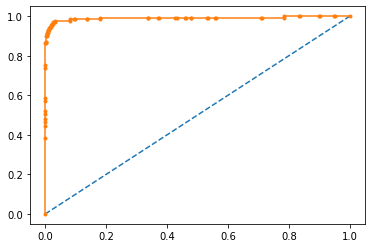

In [32]:
#Calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
#plot no skill
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

>The ROC is also high! => This model is really suitable!

## 4. Save the Model

In [33]:
import pickle
pkl_filename = "spam_ham_model.pkl" #filename
with open(pkl_filename, 'wb') as file:
  pickle.dump(model, file)

## 5. Test

In [34]:
with open(pkl_filename, 'rb') as file:
  spam_ham_model = pickle.load(file)

>for Testing:


>**X_new = ['Dear Ms. Kayla, I will come on time', 'URGENT! We are trying to contact you. Today is the last day of our campaign.']**

In [37]:
X_new = np.array(['Dear Ms. Kayla. I will come on time', 
          'URGENT! We are trying to contact you. Today is the last day of our campaign.'])
X_new = count.transform(X_new)

In [38]:
y_pred_new = spam_ham_model.predict(X_new)
y_pred_new

array([0, 0])